# **Revamping Business Strategy Using SQL & Python**
***

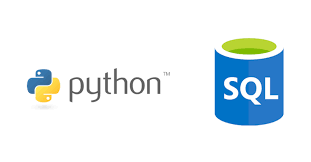

In this project, we will be working with a modified version of a database called [Chinook](https://github.com/lerocha/chinook-database). This project will analyze the data provided in the Chinook database to answer questions to improve business strategy.

A fictional electronic shop is described in the Chinook database (kind of like a mini-iTunes store). The database includes information about musicians, songs, and albums from music stores, as well as information on staff, customers, and purchases made by customers. It's a mix of real data from the iTunes store and data that was manually generated.

**Goal**: The goal of this project is to improve the company strategy by extracting business information using complicated [SQLite](https://www.sqlite.org/index.html)(a database management system) queries. The following are some of the scenarios we'll look at to improve our business strategy:
- Most Popular Genres in the USA 
- Analyzing Employee Sales Performance 
- Analyzing Sales by Country 
- Albums vs. Individual Track 
- Purchased vs. Not Purchased Tracks
- Popularity of Protected vs Non-Protected Media Types

# Summary of Results
We concluded that:
- From the 4 albums in consideration, the following 3 ones should be selected for purchasing and advertising in the USA, based on the genre popularity rating in this country: **Red Tone** (Punk), **Slim Jim Bites** (Blues), **Meteor and the Girls** (Pop).
- **Jane Peacock** demonstrates the best sales performance, while **Steve Johnson** is the worst, based on the total dollar amount in sales value, but if Steve Johnson continues on the pace he is going at as of now he is set to take over Jane Peacock in no time.
- Of all the countries, the **USA** represents the major part of the market, in terms of both the total sales and the number of customers. Countries like the United Kingdom, India, and the Czech Republic have a smaller customer base but have the potential for growth of sales.
- Since there are 4 times more single track purchases comapared to album purchases, Chinook should implement their **new strategy of purchasing popular tracks from albums instead of entire albums from record companies**.
- Almost half of the tracks within the Chinook store have never been bought. Chinook should look to purchase artists from popular genres and put more effort into advertising existing tracks from unpopular genres.
- **Protected** tracks are much less popular than **Not Protected** tracks, especially in terms of sales.

For more details, please refer to the the full analysis below.

## Concepts Used
- Jupyter Notebook
- SQLite Queries
- Joins (Inner, Left, Outer, and Recursive Joins)
- Joining Rows (Union, Intersect, Except)
- Arithmetic Operations
- Aggregate Functions
- If/Then logical statements and Column Creation
- Subqueries
- Python
- Pandas
- NumPy
- Matplotlib and Matplotlib.pyplot

## Data Overview
This dataset is provided by the [sqlite tutorial website](https://sqlitetutorial.net/sqlite-sample-database/) to practice SQLite. You can download that data file from here. First off, let's start by connecting our Notebook to the database and by importing all the Python libraries we will be using.

In [1]:
# Importing the Python liararies
import pandas as pd
import numpy as np
import sqlite3
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

## Data Exploration
Let's load the dataset and look at the tables. 
Below we will look at two of the tables from the Chinook database and the types of data types that the columns of the tables have. We will explore the `employee` table and the `customer` tables since they are the tables that have the most data and we will also load asingle table and explore some of its rows.

In [3]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view");

 * sqlite:///chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


In [4]:
%%sql
pragma table_info(employee);

 * sqlite:///chinook.db
Done.


cid,name,type,notnull,dflt_value,pk
0,employee_id,INTEGER,1,None,1
1,last_name,NVARCHAR(20),1,None,0
2,first_name,NVARCHAR(20),1,None,0
3,title,NVARCHAR(30),0,None,0
4,reports_to,INTEGER,0,None,0
5,birthdate,DATETIME,0,None,0
6,hire_date,DATETIME,0,None,0
7,address,NVARCHAR(70),0,None,0
8,city,NVARCHAR(40),0,None,0
9,state,NVARCHAR(40),0,None,0


In [5]:
%%sql
pragma table_info(customer);

 * sqlite:///chinook.db
Done.


cid,name,type,notnull,dflt_value,pk
0,customer_id,INTEGER,1,None,1
1,first_name,NVARCHAR(40),1,None,0
2,last_name,NVARCHAR(20),1,None,0
3,company,NVARCHAR(80),0,None,0
4,address,NVARCHAR(70),0,None,0
5,city,NVARCHAR(40),0,None,0
6,state,NVARCHAR(40),0,None,0
7,country,NVARCHAR(40),0,None,0
8,postal_code,NVARCHAR(10),0,None,0
9,phone,NVARCHAR(24),0,None,0


Looking at the datatypes of the two tables, we can see that our columns have all types of datatypes, with some columns having the integer datatype, others having the DateTime data type, and the majority having the NVARCHAR datatype. Next let's explore a the first five rows from the `employee` table.

In [6]:
%%sql
SELECT *
FROM employee
LIMIT 5;

 * sqlite:///chinook.db
Done.


employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


From the chinook database, we have data with 11 tables describing customers' musical records:
- employee: table stores employee data such as employee id, last name, first name, etc. It also has a field named ReportsTo to specify who reports to whom.

- customer: table stores customer data.

- invoices & invoice_line: these two tables store invoice data. The invoice table stores invoice header data and the invoice_line table stores the invoice line items data.

- artist: table stores artist data. It is a simple table that contains only the artist id and name.

- album: table stores data about a list of tracks. Each album belongs to one artist. However, one artist may have multiple albums.

- media_type: table stores media types such as MPEG audio and AAC audio files.

- genre: table stores music types such as rock, jazz, metal, etc.

- track: table stores data about songs. Each track belongs to one album.

- playlist & playlist_track: playlist stores data about playlists. Each playlist contains a list of tracks and each track may belong to multiple playlists. The relationship between the playlist table and playlist_track table is many-to-many. The playlist_track table is used to reflect this relationship

Below is a schema diagram that shows on what columns each table from the database connects:

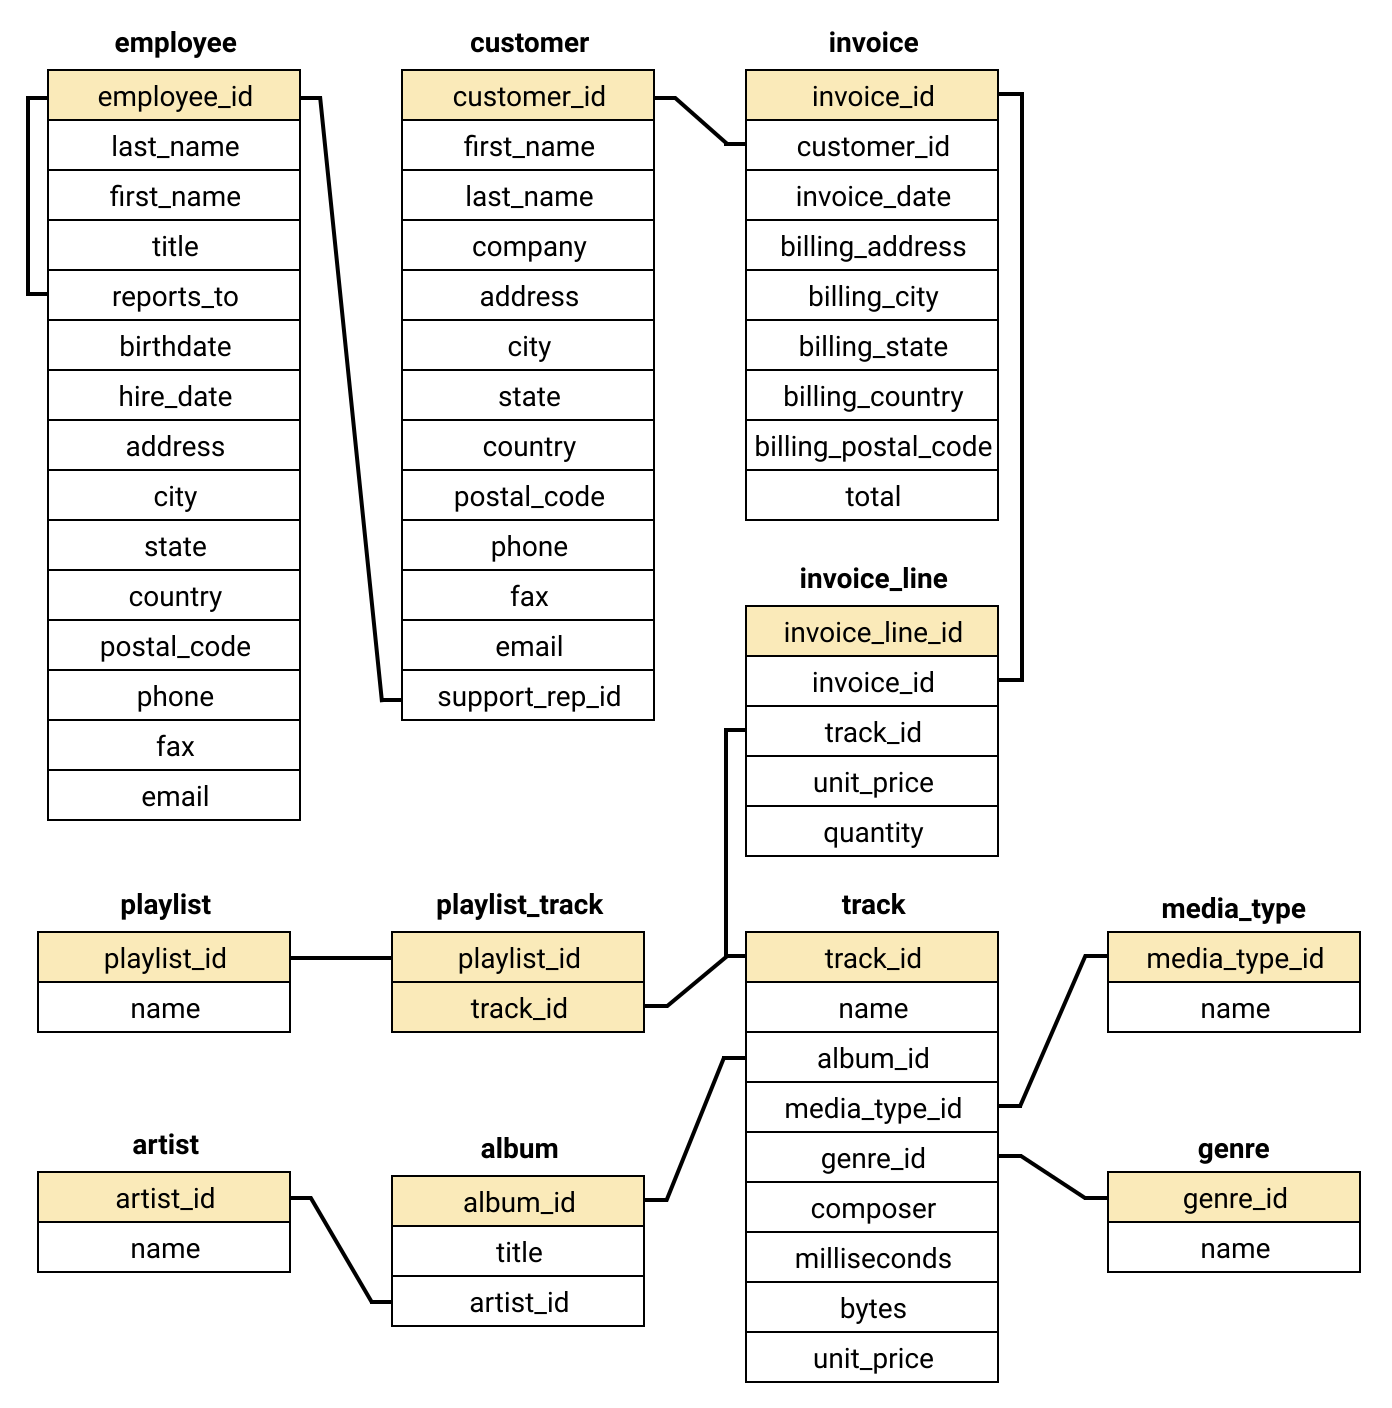

## Most Popular Genres in the USA
From now on we will be exploring different scenarios under each heading.

**Scenario**: The Chinook record store has just signed a deal with a new record label, and we have been tasked with selecting the first three albums that will be added to the store, from a list of four. The label currently has four albums by artists that don't have any tracks in the store. The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so we're interested in finding out which genres sell the best in the USA. The genre and artist names to be potentially added are:

| Artist Name | Genre |
| --- | --- |
| Regal | Hip-Hop |
| Red Tone | Punk |
| Meteor and the Girls | Pop |
| Slim Jim Bites | Blues | 

**Solution**: We will be writing a query that will return the top 10 genres in the USA, with the number of tracks sold - in absolute numbers and percentages.

Here are the tables we will use:
- `invoice_line`
- `customer`
- `track`
- `genre`

We will write a paragraph that interprets the data and make a recommendation for three artists whose albums should be purchased for the store, based on sales of tracks from their genres. We'll also display the output of our query graphically, using Python's pandas and matplotlib libraries.

In [7]:
query_1 = """
WITH customers_from_usa AS 
    (
     SELECT il.*
     FROM invoice_line AS il
     INNER JOIN invoice AS i on il.invoice_id = i.invoice_id
     INNER JOIN customer AS c on i.customer_id = c.customer_id
     WHERE c.country = "USA"
    )
SELECT g.name AS "Genre",
       COUNT(cust_usa.invoice_line_id) AS "Songs Sold",
       CAST(COUNT(cust_usa.invoice_line_id) AS Float)/ (
                                                        SELECT COUNT(*)
                                                        FROM customers_from_usa) AS Percentage
FROM customers_from_usa AS cust_usa
INNER JOIN track AS t ON t.track_id == cust_usa.track_id
INNER JOIN genre AS g ON t.genre_id == g.genre_id
GROUP BY g.name
ORDER BY 2 DESC;
"""

# Reading our query into our dataframe
conn = sqlite3.connect("chinook.db")
most_popular_genre = pd.read_sql_query(query_1, conn)  
most_popular_genre

,Genre,Songs Sold,Percentage
0,Rock,561,0.533777
1,Alternative & Punk,130,0.123692
2,Metal,124,0.117983
3,R&B/Soul,53,0.050428
4,Blues,36,0.034253
5,Alternative,35,0.033302
6,Pop,22,0.020932
7,Latin,22,0.020932
8,Hip Hop/Rap,20,0.019029
9,Jazz,14,0.013321


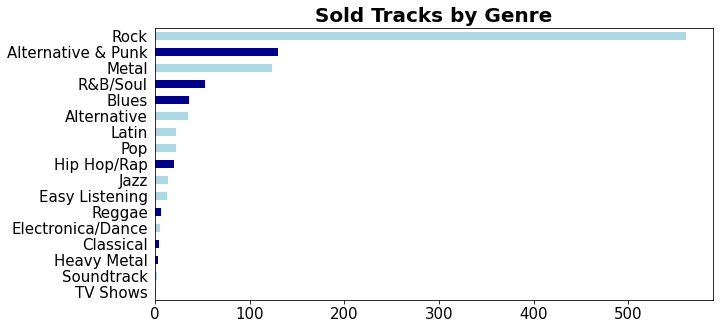

In [8]:
most_popular_genre = most_popular_genre.set_index("Genre", drop=True)
fig, ax = plt.subplots(figsize = (10,5))

# Plotting Tracks sold by Genre
ax = most_popular_genre['Songs Sold'].sort_values().plot.barh(color=['lightblue','lightblue','darkblue','darkblue','lightblue','darkblue','lightblue','lightblue','darkblue','lightblue'])
ax.set_title("Sold Tracks by Genre", fontsize=20, weight = "bold")
ax.set_ylabel("",weight = "bold")
ax.tick_params(axis="both", 
               labelsize=15, 
               left = False)

The top three most popular music genres in the United States are **Rock, Alternative & Punk, and Metal**, with a gap between all genres that continues to grow. Because our **objective is to maximize sales**, the **top three artists on the list that we should adversities** are:

| Artist Name | Genre |
| --- | --- |
| Red Tone | Punk |
| Slim Jim Bites | Blues | 
| Meteor and the Girls | Pop |

It's worth keeping in mind that combined, these three genres only make up only 17% of total sales, so we should be on the lookout for artists and albums from the `rock` genre, which accounts for 53% of sales.

## Analyzing Employee Sales Performance
**Scenario**: Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. Our job is to analyze the purchases of customers belonging to each employee to see if any of the sales agents are performing either better or worse than the other ones.

**Solution**: We will find the employee's name, birth date, hire date, country, and the total sales in dollars for a specific employee.

Here are the tables we will be using:
- `invoice`
- `customer`
- `employee`


In [9]:
query_2 = """
WITH each_unique_customer_support_rep AS 
    (
     SELECT
        inv.customer_id,
        cust.support_rep_id,
        SUM(inv.total) AS "Total",
        inv.invoice_id
     FROM invoice AS inv
     INNER JOIN customer AS cust on inv.customer_id = cust.customer_id
     GROUP BY inv.customer_id, cust.support_rep_id
    )
SELECT 
    e.first_name || " " || e.last_name AS "Employee Name",
    e.birthdate AS "Birth Date",
    e.hire_date AS "Hire Date",
    e.country AS "Country",
    SUM(eucsr.total) AS "Total Sales in Dollars"
    FROM each_unique_customer_support_rep AS eucsr
INNER JOIN employee AS e ON e.employee_id = eucsr.support_rep_id
GROUP BY 1;
"""
analyzing_employee = pd.read_sql_query(query_2, conn) 
analyzing_employee = analyzing_employee.set_index("Employee Name", drop=True)
analyzing_employee

,Birth Date,Hire Date,Country,Total Sales in Dollars
Employee Name,,,,
Jane Peacock,1973-08-29 00:00:00,2017-04-01 00:00:00,Canada,1731.51
Margaret Park,1947-09-19 00:00:00,2017-05-03 00:00:00,Canada,1584.00
Steve Johnson,1965-03-03 00:00:00,2017-10-17 00:00:00,Canada,1393.92


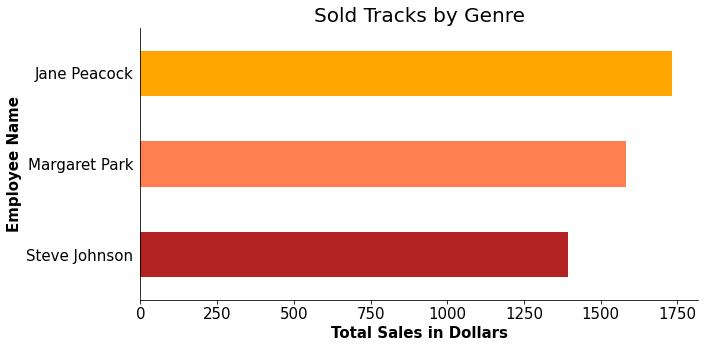

In [10]:
fig, ax = plt.subplots(figsize = (10,5))
ax = analyzing_employee.loc[:,"Total Sales in Dollars"].sort_values().plot.barh(color = ["firebrick","coral","orange"])
# Graph Aesthetics
ax.set_title("Sold Tracks by Genre", fontsize=20)
ax.set_xlabel("Total Sales in Dollars", weight = "bold", fontsize = 15)
ax.set_ylabel("Employee Name",weight = "bold", fontsize = 15 )
ax.tick_params(axis="both", 
               labelsize=15, 
               left = False)
for location in ['right', 'top']:
        ax.spines[location].set_visible(False)

In total we have 3 sales support agents, all from Canada with incomplete information. Here are some unique observations:
- Steve Johnson, who was hired from Jane Peacock 5 months and 16 days later, has climbed the total sales dollar rankings. He has nearly \\$1400 in sales in 5 months, whereas Jane Peacock has \\$1731 in 6 months.
- The top and bottom employees have roughly a 20% difference in Total Amount of Sales.

Although we are measuring performance in terms of dollars, we can say that Jane Peacock has the best performance right now and Steve Johson has the worst performance. If Steve keeps up his current pace, he will be able to overtake Jane in no time.

## Analyzing Sales by Country
**Scenario**: Next, we will analyze the sales data for customers from each different country. We will do this so we can know the metrics for other countries and how they compare.

**Solution**: We will combine data on total number of customers, total value of sales, average order value, and average value of sales per customer for every country.

Since there are a number of countries with only one customer, we will group these customers as "Other" in our analysis.
The results will be sorted by the total value of sales column in descending order, with the "Other" group at the bottom of the table.

We will use the following tables:

- `customer`
- `invoice`
- `country`

In [11]:
query_3 = """
WITH
main_query AS
    (
    SELECT
        CASE
           WHEN (
                 SELECT COUNT(*)
                 FROM customer
                 WHERE country = cst.country
                ) = 1 THEN "Other"
        ELSE cst.country
        END AS Country,
        COUNT(distinct cst.customer_id) AS "Total Customers",
        ROUND(CAST(100*COUNT(distinct cst.customer_id) AS FLOAT)/CAST((SELECT COUNT(customer_id) FROM customer) AS FLOAT),2) AS "Customer Percentage",
        ROUND(SUM(inv.total),2) AS "Total Value of Sales",
        ROUND(CAST(100*SUM(inv.total) AS FLOAT)/CAST((SELECT SUM(total) FROM invoice) AS FLOAT),2) AS "Sale Percentage",
        ROUND(CAST(SUM(inv.total) AS FLOAT)/CAST(COUNT(cst.customer_id) AS FLOAT),2) AS "Average Order Value",
        ROUND(CAST(SUM(inv.total) AS FLOAT)/CAST(COUNT(distinct cst.customer_id) AS FLOAT),2) AS "Average Value of Sales per Customer"
    FROM customer cst
    INNER JOIN invoice inv ON inv.customer_id = cst.customer_id
    GROUP BY 1
    ORDER BY 4 DESC
    )
SELECT
    "Country",
    "Total Customers",
    "Customer Percentage",
    "Total Value of Sales",
    "Sale Percentage",
    "Average Order Value",
    "Average Value of Sales per Customer"
FROM
    (
    SELECT
        mq.*,
        CASE
            WHEN mq.country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM main_query mq
    )
ORDER BY sort ASC
"""
analyzing_countries = pd.read_sql_query(query_3, conn)  
analyzing_countries
# Resetting Index
analyzing_countries = analyzing_countries.set_index("Country", drop=True)

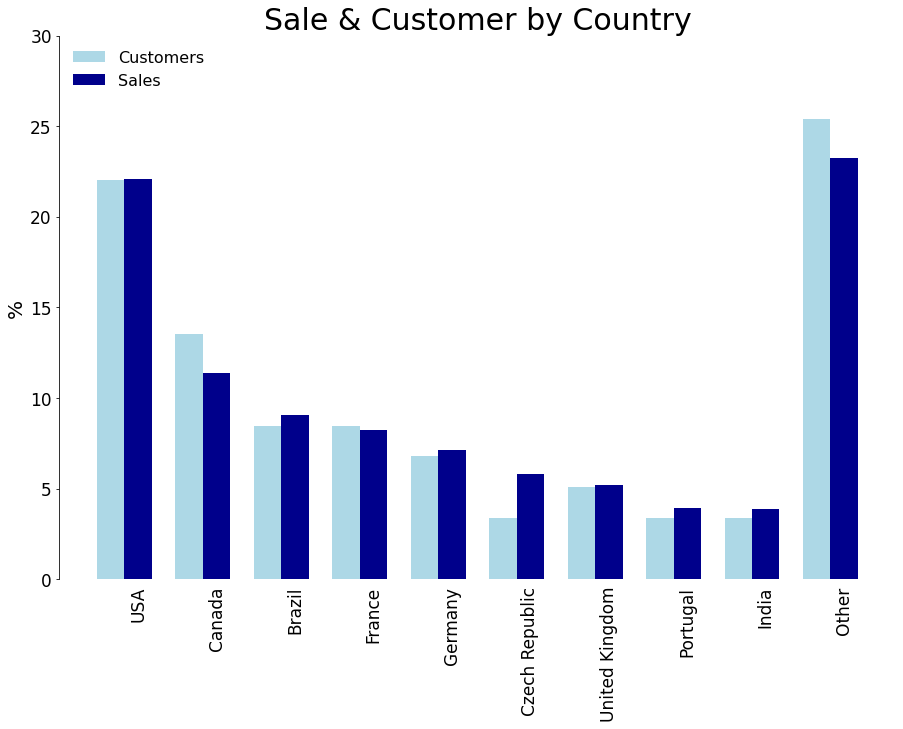

In [12]:
# Function for creating Grouped bar charts
def grouped_bar_chart(df,fig_width,fig_height,bar_width,col1,col2,
                   label1,label2,title,ylabel,
                   ylim_lower,ylim_upper,loc,rotation,
                   bbox_to_anchor):
    
    # Converting Series to list
    col1_list = col1.tolist()
    col2_list = col2.tolist()
    
    # Creating Labels from the index
    labels = df.index.tolist()
    
    # Label Locations
    x = np.arange(len(labels))
    
    # Plotting data
    fig, ax = plt.subplots(figsize=(fig_width,fig_height))
    ax.bar(x - bar_width/2, col1_list, bar_width, label=label1,color='lightblue')
    ax.bar(x + bar_width/2, col2_list, bar_width, label=label2,color='darkblue')
    
    # Plot aesthetics
    ax.set_title(title, fontsize=30)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_ylim(ylim_lower, ylim_upper)
    ax.set_xticks(x + bar_width/2)
    ax.set_xticklabels(labels,fontsize=17,rotation=rotation)
    ax.tick_params(bottom = False,labelsize=17)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.legend(loc=loc,bbox_to_anchor=bbox_to_anchor,fontsize=16,frameon=False)


grouped_bar_chart(analyzing_countries,15,10,0.35, analyzing_countries['Customer Percentage'],analyzing_countries['Sale Percentage'],
                  'Customers','Sales','Sale & Customer by Country','%',0,30,"upper left",90,None)

Here is some unique observations we can make:
- The country that dominates that Sales and Customers are the USA excluding the "Other" group.
- Countries in the "Other" group overall has more sales than the USA combined.
- Most customers from each country spend between \\$70 - \\$80 dollars except for Czech Republic where the two customers that have purchased songs or albums from the virtual store have spent \\$136 on average.

Based on the data, there may be an opportunity in the following countries:
- Czech Republic
- United Kingdom
- India

It's worth keeping in mind that the amount of data from each of these countries is relatively low. Because of this, we should be cautious spending too much money on new marketing campaigns, as the sample size is not large enough to give us high confidence. A better approach would be to run small campaigns in these countries, collecting and analyzing the new customers to make sure that these trends hold with new customers.

## Albums vs. Individual Track
**Scenario**: The Chinook store is setup in a way that allows customer to make purchases in one of the two ways:
- purchase a whole album
- purchase a collection of one or more individual songs

The store does not let customers purchase a whole album, and then add individual tracks to that same purchase (unless they do that by choosing each track manually). When customers purchase albums they are charged the same price as if they had purchased each of those tracks separately. Management are currently considering changing their purchasing strategy to save money. The strategy they are considering is to purchase only the most popular tracks from each album from record companies, instead of purchasing every track from an album. 

Our goal is to find out what percentage of purchases are individual tracks vs albums as a whole, so that the management can use this data to understand the potential effects of this change on overall revenue/

**Solution**: We will find the percentage of purchases that are individual tracks vs. whole albums.

We will use the following tables:
- `invoice_line`
- `track`

In order to answer the question, we're going to have to identify whether each invoice has all the tracks from an album. We can do this by getting the list of tracks from an invoice and comparing it to the list of tracks from an album. We can find the album to compare the purchase to by looking up the album that one of the purchased tracks belongs to. It doesn't matter which track we pick, since if it's an album purchase, that album will be the same for all tracks. We will write a paragraph to interpret the results and represent the information using a pie chart. 

In [13]:
query_4 = """
WITH invoice_first_track AS
    (
     SELECT
         il.invoice_id invoice_id,
         MIN(il.track_id) first_track_id
     FROM invoice_line il
     GROUP BY 1
    )

SELECT
    album_purchase AS "Album Purchased(Yes/No)",
    COUNT(invoice_id) "Number of Invoices",
    ROUND(CAST(count(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                      )*100,4)  AS "Percentage"
FROM
    (
    SELECT
        ifs.*,
        CASE
            WHEN
                 (
                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 

                  EXCEPT 

                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id
                 ) IS NULL
             AND
                 (
                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id

                  EXCEPT 

                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 
                 ) IS NULL
             THEN "yes"
             ELSE "no"
         END AS "album_purchase"
     FROM invoice_first_track ifs
    )
GROUP BY album_purchase;
"""
analyzing_album_individual_tracks = pd.read_sql_query(query_4, conn)  
# Resetting Index
panalyzing_album_individual_tracks = analyzing_album_individual_tracks.set_index("Album Purchased(Yes/No)", drop=True)
analyzing_album_individual_tracks

,Album Purchased(Yes/No),Number of Invoices,Percentage
0,no,500,81.4332
1,yes,114,18.5668


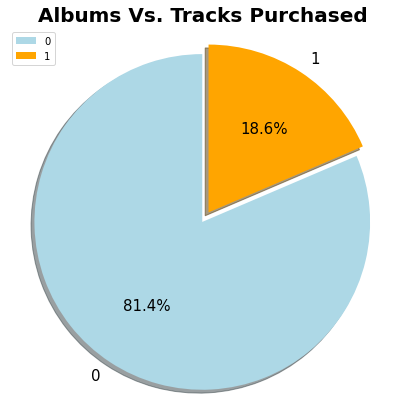

In [14]:
analyzing_album_individual_tracks.plot.pie(y='Percentage', 
                                           figsize=(5, 5),
                                           colors=['lightblue','orange'],
                                           explode=(0,0.068), 
                                           startangle=90,
                                           autopct="%1.1f%%",
                                           shadow = True,
                                           textprops={'fontsize': 15})
# Aesthetics for the graph
plt.title('Albums Vs. Tracks Purchased', fontsize=20, weight = "bold")
plt.ylabel("")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(7,7)

From looking at the pie chart above we can see that - there are 4 times more single track purchases compared to album purchases.

Considering the observation, we would recommend the Chinook to implement the strategy of only purchasing the most popular songs from each album instead of entire albums from record companies usually. 

This change would not affect more than 80% of customers, but the company would benefit because it would reduce its purchasing expenses. Although doing so may cause Chinook to lose one-fifth of its revenue, it is still possible to recover that revenue by looking at an album's sales in its first week and then, if the album sells more than expected, adding that album to the store would benefit them in terms of revenue. In addition the impact to album-buying cusomters could be mitigated by also keeping an inventory of albums from popular artists, genres, or record labels only.

## Purchased vs. Not Purchased Tracks
**Scenario**: Chinook wants to know the metrics for Purchased vs. Not Purchased Tracks

**Solution**: We will calculate how many unique tracks were sold. We will have to distinguish between the entire inventory of tracks in the track table and the distinct instances of tracks from the invoice_line table.

We will use the following tables:
- `track`
- `invoice_line`

In [15]:
query_5 = """
WITH all_vs_sold AS 
    (SELECT 
        COUNT(DISTINCT(t.track_id)) AS "Total Songs", 
        COUNT(DISTINCT(il.track_id)) AS "Sold Songs"
     FROM track AS t
    LEFT JOIN invoice_line AS il 
                            ON il.track_id = t.track_id
    )

SELECT all_vs_sold.*,
       ROUND("Sold Songs" * 100.0 / "Total Songs", 0) AS "Percent Purchased"
  FROM all_vs_sold;
"""
analyzing_purchased_not_purchased = pd.read_sql_query(query_5, conn)  

# Creating the a new column for the unpurchased tracks
analyzing_purchased_not_purchased.loc[:,"Percent Not Purchased"] = 100 - analyzing_purchased_not_purchased.loc[:,"Percent Purchased"]
analyzing_purchased_not_purchased

,Total Songs,Sold Songs,Percent Purchased,Percent Not Purchased
0,3503,1806,52.0,48.0


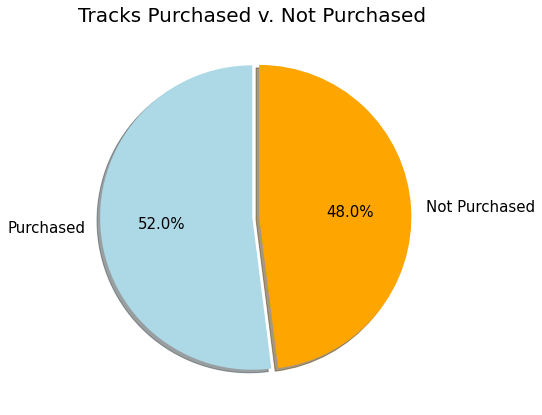

In [16]:
# Plotting pie chart
list1 = analyzing_purchased_not_purchased.loc[0,["Percent Purchased","Percent Not Purchased"]].tolist()
plt.pie(list1,labels=('Purchased', 'Not Purchased'),
        explode=(0,0.045), 
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 15},
        shadow = True,
        colors=['lightblue','orange'])

# Plot Aesthetics
plt.title('Tracks Purchased v. Not Purchased', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(7,7)

Almost half of all the unique tracks available in the Chinook store were never bought, probably being of unpopular genre or unpopular artists

In [17]:
query_7 = """
WITH helper_query AS
                    (
                     SELECT
                         track_id,
                         genre_id
                     FROM track

EXCEPT

                     SELECT
                         invoice_line.track_id,
                         track.genre_id
                     FROM invoice_line
                     INNER JOIN track on track.track_id = invoice_line.track_id
)
SELECT
    genre.name AS "Genre",
    COUNT(distinct track_id) AS "Tracks Not Purchased",
    ROUND(100*CAST(COUNT(track_id) AS FLOAT)/CAST((SELECT COUNT(track_id) FROM helper_query) AS FLOAT),2) AS "Percentage"
FROM helper_query
INNER JOIN genre ON genre.genre_id = helper_query.genre_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10;
"""
# Reading our query and database into a DataFrame
top_genres_and_artist = pd.read_sql_query(query_7, conn)
# Resetting Index
top_genres_and_artist = top_genres_and_artist.set_index("Genre", drop=True)
top_genres_and_artist

,Tracks Not Purchased,Percentage
Genre,,
Latin,460,27.11
Rock,382,22.51
Alternative & Punk,156,9.19
Metal,136,8.01
TV Shows,91,5.36
Jazz,69,4.07
Drama,63,3.71
Classical,58,3.42
Soundtrack,38,2.24


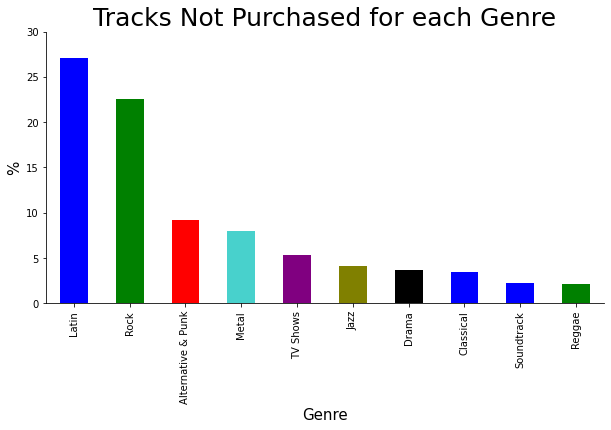

In [18]:
# Plotting Tracks sold by Genre
fig, ax = plt.subplots(figsize=(10,5))
ax = top_genres_and_artist.loc[:,'Percentage'].plot.bar(color= ["blue","green","red","mediumturquoise","purple","olive",
                                                                "black","blue","blue","green"])

# Plot Aesthetics
ax.set_title("Tracks Not Purchased for each Genre", fontsize=25)
ax.set_ylabel("Frequency",fontsize=15)
ax.set_xlabel("Genre", fontsize=15)
ax.set_ylabel("%", fontsize=15)
ax.set_ylim(0, 30)
for each_location in ["top","right"]:
    ax.spines[each_location].set_visible(False)

The most popular artist for tracks not purchased is Latin followed by Rock and Alternative & Punk. It is interesting to see the Rock genre in this list since it is the most popular genre within the USA according to tracks sold. An interesting observation would be to look at specific artists within the Rock genre which are unpopular.

Possible solutions here may include a new advertising campaign (especialy in the USA, as the biggest segment of market), sales promotion, additional training and motivation of the sales support agents.

## Protected vs Non-Protected Media Types
**Scenario**: Any given track sold by Chinook is either protected or non-protected. A protected media type has associated rules for using its content. It may be encrypted using some form of digital rights management encryption. The purchaser is not able to make copies and is restricted to listening the platform from which they bought it (iTunes for example). A non-protected track allows the purchaser to make copies and listen to it on multiple platforms.

In Chinook protected tracks are identified by the following media_type_id's:
- Protected AAC audio file
- Protected MPEG-4 video file

Non-Protected tracks are identified by these media_type_id's:
- MPEG audio file
- Purchased AAC audio file
- AAC audio file

Chinook wants to know metrics of Protected vs Non-Protected Media Types.

**Solution**: We will calculate the percentage of protected vs. non-protected tracks. Then, we will see the breakdown of protected vs. non-protected tracks for sold and not sold tracks.

We will use the following tables:

- `track`
- `media_type`



               unique_tracks  pct_unique  sold_unique  pct_sold_unique
media_type                                                            
Non-protected           3052        87.0         1652             54.0
Protected                451        13.0          154             34.0


               sold  pct_sold
media_type                   
Non-protected  4315      91.0
Protected       442       9.0




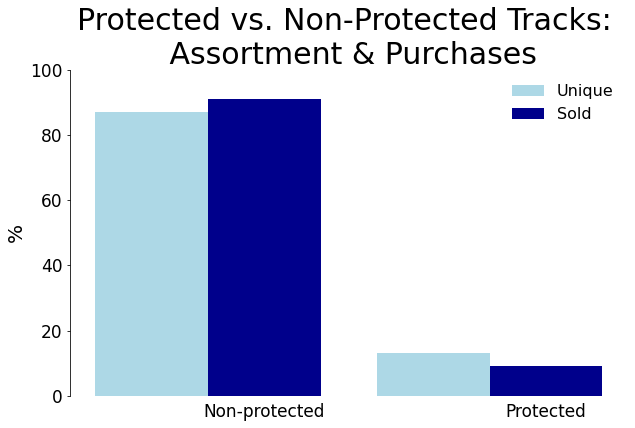

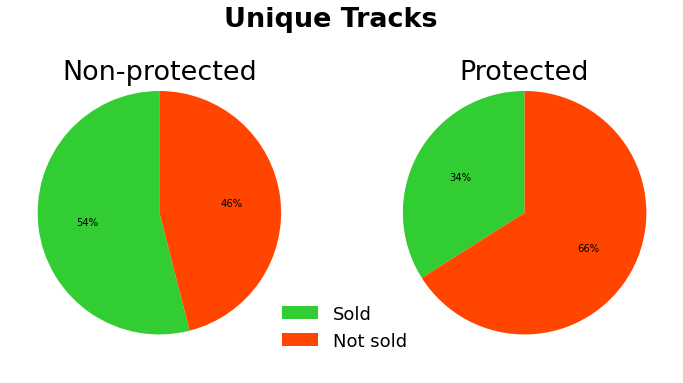

In [19]:
query_8 = """ 
WITH non_protected AS (SELECT COUNT(mt.name) to_be_renamed, 
                              COUNT(DISTINCT(t.track_id)) unique_tracks, 
                              COUNT(DISTINCT(il.track_id)) sold_unique,
                              COUNT(il.track_id) sold
                         FROM media_type mt
                              INNER JOIN track t 
                              ON mt.media_type_id = t.media_type_id
                       
                              LEFT JOIN invoice_line il 
                              ON il.track_id = t.track_id                        
                        WHERE mt.name != "Protected AAC audio file" 
                          AND mt.name != "Protected MPEG-4 video file"),

     protected AS     (SELECT COUNT(mt.name) to_be_renamed, 
                              COUNT(DISTINCT(t.track_id)) unique_tracks, 
                              COUNT(DISTINCT(il.track_id)) sold_unique,
                              COUNT(il.track_id) sold
                         FROM media_type mt
                              INNER JOIN track t 
                              ON mt.media_type_id = t.media_type_id
                       
                              LEFT JOIN invoice_line il 
                              ON il.track_id = t.track_id                        
                        WHERE mt.name = "Protected AAC audio file" 
                           OR mt.name = "Protected MPEG-4 video file"),
    
     united AS        (SELECT CASE 
                              WHEN to_be_renamed != 0 THEN "Non-protected" 
                              END AS media_type,
                              
                              unique_tracks,     
                              sold_unique,
                              ROUND(sold_unique * 100.0 / unique_tracks, 0) pct_sold_unique,
                              sold  
                         FROM non_protected  

                        UNION

                       SELECT CASE 
                              WHEN to_be_renamed != 0 THEN "Protected" 
                              END AS media_type,
                       
                              unique_tracks,     
                              sold_unique,
                              ROUND(sold_unique * 100.0 / unique_tracks, 0) pct_sold_unique,
                              sold
                         FROM protected)
    
SELECT media_type,
       unique_tracks,
       ROUND(unique_tracks * 100.0 / (SELECT SUM(unique_tracks) 
                               FROM united), 0) pct_unique,    
       sold_unique,
       pct_sold_unique,
       sold,
       ROUND(sold * 100.0 / (SELECT SUM(sold) 
                               FROM united), 0) pct_sold
FROM united;
"""

# Reading SQL results into a pandas DataFrame
proc_vs_non_proc = pd.read_sql_query(query_8, conn).set_index("media_type", drop=True) 
proc_vs_non_proc

#Printing the dataframe
print("\n")
print(proc_vs_non_proc.iloc[:, :4])
print("\n")
print(proc_vs_non_proc.iloc[:, 4:])
print("\n")

# Creating a grouped bar chart for protected vs. non-protected tracks
grouped_bar_chart(df = proc_vs_non_proc,
                       fig_width=10,
                       fig_height=6,
                       bar_width = 0.400,
                       col1=proc_vs_non_proc["pct_unique"], 
                       col2=proc_vs_non_proc["pct_sold"], 
                       label1="Unique",
                       label2="Sold", 
                       title="Protected vs. Non-Protected Tracks: \n Assortment & Purchases", 
                       ylabel="%",
                       ylim_lower=0,
                       ylim_upper=100,                      
                       loc=0,
                       rotation=0,
                       bbox_to_anchor=None)
plt.show()
print("\n")

# Creatting a new dataframe for pie charts
proc_vs_non_proc = proc_vs_non_proc[["pct_sold_unique"]].copy()
proc_vs_non_proc[["pct_not_sold_unique"]] = 100 - proc_vs_non_proc[["pct_sold_unique"]]
proc_vs_non_proc = proc_vs_non_proc.transpose() 

# Creating labels
labels = ["Sold", "Not sold"]

# Selecting data to plot
sizes_1 = proc_vs_non_proc["Non-protected"]
sizes_2 = proc_vs_non_proc["Protected"]

# Plotting the data using pie charts
fig,ax = plt.subplots(figsize=(12,6))
fig.suptitle("Unique Tracks", 
             fontsize=27, 
             fontweight="bold", 
             y=0.98)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.pie(sizes_1, 
        autopct="%1.0f%%", 
        startangle=90, 
        colors=("limegreen", "orangered"))
ax1.set_title("Non-protected", 
              fontsize=27, 
              y=0.92)

ax2.pie(sizes_2, 
        autopct="%1.0f%%", 
        startangle=90, 
        colors=("limegreen", "orangered"))
ax2.set_title("Protected", 
              fontsize=27, 
              y=0.92)

ax.axis("equal")  # Equal aspect to draw the pies as a circle
ax.set_xticklabels("", fontsize=0)
ax.set_yticklabels("", fontsize=0)
ax.tick_params(axis="both", 
               left = False, 
               bottom=False)

for key,spine in ax.spines.items():
        spine.set_visible(False) 
        
ax1.legend(fontsize=18, 
           labels=labels,            
           bbox_to_anchor=(0.85,0.25), 
           frameon=False)
plt.show()

From this table, we can make the following observations:

- Only 13% of all the unique tracks available in the Chinook store are of protected media types.
- From all the unique tracks of protected media types, only 34\% were sold, while from those of non-protected ones - 54\%.
- Among all the tracks that were sold, those of protected media types amounts only to 9%.

In a nutshell, the **tracks of protected media types are much less popular** than those of non-protected, both in terms of the store assortment and, especially, in terms of sales. It can be easily explained by a cumbersome way of their using, which is not really justified when it comes to buying media products for entertainment. Hence, as a future strategy, it is not recommended to the store to purchase such tracks from record companies.

# Conclusion
In this project, we analyzed and visualized the Chinook database to gain insights into the business and improve its revenue strategy. Below are the main results, with emphasis on factors for maximizing revenue:
- From the 4 albums in consideration, the following 3 ones should be selected for purchasing and advertising in the USA, based on the genre popularity rating in this country: **Red Tone** (Punk), **Slim Jim Bites** (Blues), **Meteor and the Girls** (Pop).
- **Jane Peacock** demonstrates the best sales performance, while **Steve Johnson** is the worst, based on the total dollar amount in sales value, but if Steve Johnson continues on the pace he is going at as of now he is set to take over Jane Peacock in no time.
- Of all the countries, the **USA** represents the major part of the market, in terms of both the total sales and the number of customers. Countries like the United Kingdom, India, and the Czech Republic have a smaller customer base but have the potential for growth of sales.
- Customers tend to buy **individual tracks** much more often than the whole albums. Hence, it's recommended to the Chinook store to purchase only the most popular tracks from each album from record companies.
- Almost **half** of the tracks within the Chinook store have never been **bought**. Possible solutions here may include a new **advertising campaign**, **sales promotion**, additional **training and motivation** of sales support agents.
- The tracks of **protected** media types are much less popular than those of **non-protected**, both in terms of the store assortment and, especially, in terms of sales. Hence the store should avoid purchasing such tracks.